<h1><center>Reddit Sentiment Analysis - C964 Vikram Reddy</center></h1>

In [134]:
#import packages
import praw
from datetime import date, timedelta
import os
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.core.display_functions import display

Define Variables

In [135]:
g_client_id="hwukA0emNXXE_iaver84pg"
g_client_secret="Gly0NvAbFwi5rFmjN-UvyjfJ3uIP8g"
g_user_agent="SentimentAnalysisScraper"
g_subreddit = "Excel"
g_num_posts=250

<h2>Getting Posts and Comments from Reddit</h2>

In [136]:
def init_reddit_app():
    reddit = praw.Reddit(
        client_id=g_client_id,
        client_secret=g_client_secret,
        user_agent=g_user_agent
    )
    return reddit


def get_posts(reddit, subreddit,time_span):
    posts = []
    top_posts = reddit.subreddit(subreddit).top(time_filter=time_span, limit=g_num_posts)

    for post in top_posts:
        posts.append(post.id)
    return posts


def get_comments(reddit, posts_id):
    df_comments = pd.DataFrame(columns=['post_id', 'comment_id', 'comment_text'])
    for _id in posts_id:
        submission = reddit.submission(id=_id)
        #print(submission.title, submission.num_comments)
        submission.comments.replace_more(limit=0)

        for comment in submission.comments.list():
            try:
                df_comments.loc[len(df_comments.index)] = [comment.submission.id, comment.id, comment.body]
            except AttributeError:
                pass
    return df_comments


def get_data(subreddit,time_span):
    reddit = init_reddit_app()
    postids = get_posts(reddit, subreddit, time_span)
    df = get_comments(reddit, postids)
#   display(df)
    return df

## Score the Comments

In [137]:
def sentiment_analyser_score(df):
    analyser = SentimentIntensityAnalyzer()
    df_sentiment = pd.DataFrame(columns=["comment_id", "comp_score", "sentiment"])
    #   values = list(df.comment_text.values.flatten())
    values = list(df.comment_text.values)
    for row in values:
        score = analyser.polarity_scores(row)
        if score["compound"] > 0.5:
            sentiment = "positive"
        elif score["compound"] < -0.05:
            sentiment = "negative"
        else:
            sentiment = "neutral"
        df_sentiment.loc[len(df_sentiment.index)] = [df.comment_id.loc[len(df_sentiment.index)], score["compound"], sentiment]
        #      Add sentiment to df
    combined_df = df_sentiment.join(df.set_index("comment_id"), on="comment_id")
    #display(combined_df)

    return combined_df

def score_data(df):
    """
    """
    _df = sentiment_analyser_score(df).sort_values(by='comp_score',ascending=False)
  #  display(_df['comment_text'].head(10))         
    return _df


In [138]:
def display_comments(df):
    _df = sentiment_analyser_score(df).sort_values(by='comp_score',ascending=False)
    display(_df['comment_text'].head(10))  

In [139]:
def make_plot(df):
    df = df["comp_score"].rolling(400).mean()
    plt.plot(df)
    plt.xlabel("comment no")
    plt.ylabel("Compound Sentiment Score")
    plt.title("Running mean of Compound Sentiment Score, /r/soccer")
    plt.show()

In [140]:
def make_chart(df,time):
    fig, ax = plt.subplots()
    df=df["sentiment"].value_counts().sort_index(axis=0).plot(kind='bar',color=['tab:red','tab:blue','tab:green'])
    plt.title("Sentiment in /r/" + g_subreddit + " comments from past " + time)
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_ylabel('# of comments')
    plt.xticks(rotation=0)
    plt.show()


In [141]:
def comp_chart(df_d, df_w, df_m):
    fig, ax = plt.subplots()
    time = ['day', 'week', 'month']
    freq = [int(df_d['sentiment'].value_counts()["positive"]/len(df_d)*100),
            int(df_w['sentiment'].value_counts()["positive"]/len(df_w)*100),
            int(df_m['sentiment'].value_counts()["positive"]/len(df_m)*100)
            ]
    ax.bar(time, freq)
    ax.set_ylabel('% of positive comments')
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_title('Percentage of Positive /r/'+ g_subreddit + ' comments')
    plt.show()

## Daily Chart

importing posts


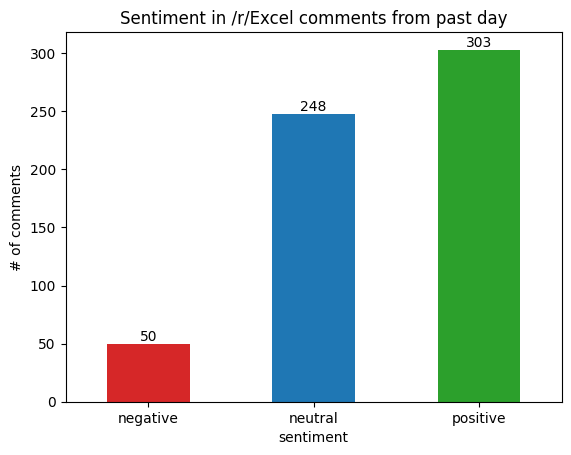

In [142]:
print("importing posts")
df_day = get_data(g_subreddit,'day')
    
    #Analyze
scores_day = score_data(df_day)
   
    #Generate Charts
plot_day = make_chart(scores_day,"day") 

## 10 most Positive Comments - Daily 

In [143]:
display_comments(df_day)

159    Acronyms, initialisms, abbreviations, contract...
90     Acronyms, initialisms, abbreviations, contract...
451    Acronyms, initialisms, abbreviations, contract...
68     Acronyms, initialisms, abbreviations, contract...
418    Acronyms, initialisms, abbreviations, contract...
556    Acronyms, initialisms, abbreviations, contract...
257    Haha happy to help! :D\n\nMind replying with "...
212    Acronyms, initialisms, abbreviations, contract...
500    Acronyms, initialisms, abbreviations, contract...
260    Acronyms, initialisms, abbreviations, contract...
Name: comment_text, dtype: object

## Weekly Chart

importing posts
10 most positive posts in the past week


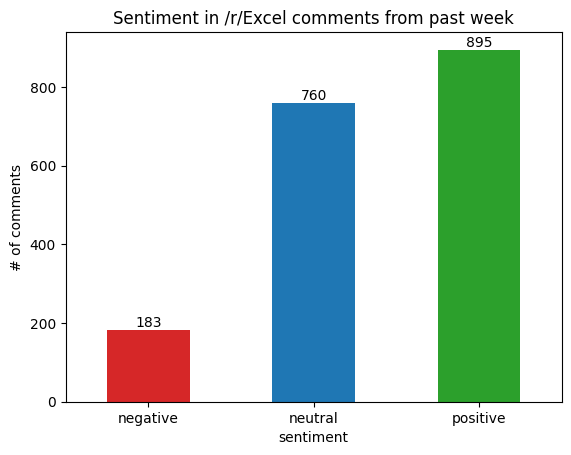

In [144]:
print("importing posts")
df_week = get_data(g_subreddit,'week')
print("10 most positive posts in the past week")
scores_week = score_data(df_week)

plot_week = make_chart(scores_week,"week")

## 10 most positive comments - week

In [145]:
display_comments(df_week)

1070    Sure. I based this on the sample you included ...
321     Feeling overwhelmed by Excel’s functions and f...
1101    Thank you. What is one way to share excel link...
877     Acronyms, initialisms, abbreviations, contract...
103     One of the best ways is to google something li...
107     Find something in your daily life to track, co...
1252    >Using an Xlookup would return the first or la...
127     It seems like a million years ago when I start...
105     Watch videos or ExcelIsFun is a great resource...
93      I am the Excel guru in my department of over 5...
Name: comment_text, dtype: object

## Monthly Chart

importing posts


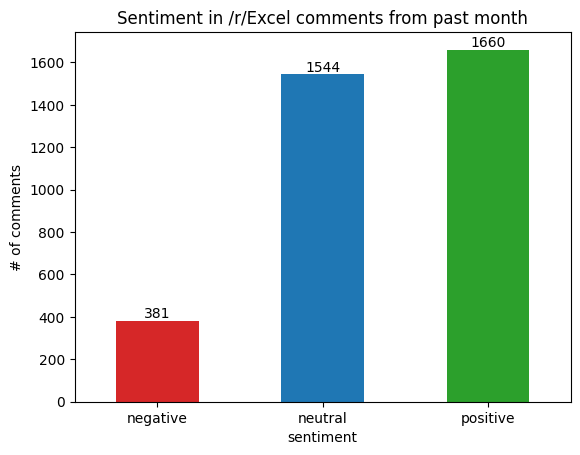

In [146]:
print("importing posts")
df_month = get_data(g_subreddit,'month')
scores_month = score_data(df_month)
    
plot_month = make_chart(scores_month,"month")

## 10 most positive comments - Month

In [147]:
display_comments(df_month)

1600    You're limiting your abilities and capacity to...
885     Lots and lots and lots of jobs use Excel. It's...
920     My guess is it overwhelms you because you're t...
904     I work for a multimillion dollar manufacturing...
652     That is foolish.   I contribute where it falls...
900     I don't think Excel is going anywhere any time...
1802    Feeling overwhelmed by Excel’s functions and f...
1696    Acronyms, initialisms, abbreviations, contract...
1826    Acronyms, initialisms, abbreviations, contract...
921     You're not using SQL for the fancy stuff but i...
Name: comment_text, dtype: object

## Percentage of positive comments over time

charting sentiment


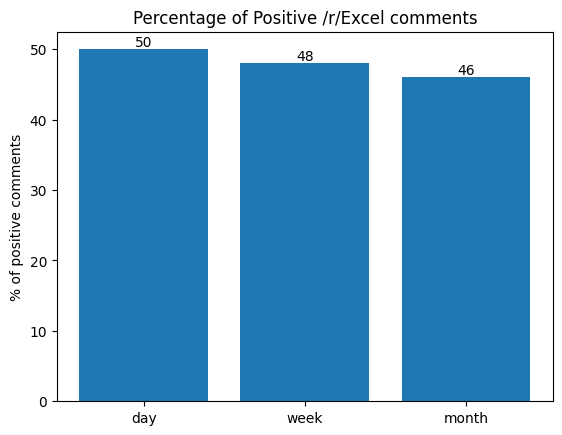

In [148]:
print("charting sentiment")
plot_chart = comp_chart(scores_day,scores_week,scores_month) 